<a href="https://colab.research.google.com/github/iamjustkay/-TransBorder-Freight-Data-Analysis-Project/blob/main/Transport_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A structured data analysis using the CRISP-DM methodology, covering:**

* Business understanding

* Data loading & cleaning

* Exploratory data analysis (EDA)

* Insights & visualizations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setup aesthetics
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
#Load Dataset
df = pd.read_csv("2023_TransData.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Quick preview
df.head()

,2023_Transdata,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
0,dot1_0123.csv,1,AK,0115,5,NaN,XB,1220,6536,0,222,1.0,X,1,2023
1,dot1_0123.csv,1,AK,0115,5,NaN,XB,1220,10294,0,350,2.0,X,1,2023
2,dot1_0123.csv,1,AK,0712,5,NaN,XQ,1220,60692,0,2209,1.0,X,1,2023
3,dot1_0123.csv,1,AK,0901,5,NaN,XO,1220,5480,0,107,1.0,X,1,2023
4,dot1_0123.csv,1,AK,09XX,3,NaN,XO,1220,12284,5,240,2.0,X,1,2023


In [3]:
# Converting to ordinal
month_order = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',
               6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}

transtype = {1:'Import', 2:'Export'}
ModeofTransport = {1:'Vessel', 3:'Air', 4:'Mail (U.S. Postal Service)',
                   5:'Truck', 6:'Rail', 7:'Pipeline', 8:'Other', 9:'Foreign Trade Zones (FTZs)'}
df['Mode_Label'] = df['DISAGMOT'].map(ModeofTransport)
df['Trade_Type'] = df['TRDTYPE'].map(transtype)
df['Month_Name'] = df['MONTH'].map(month_order)

In [4]:
#Basic Info and Check for Nulls

print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nInfo:")
df.info()

print("\nMissing values:")
print(df.isnull().sum())

Dataset Shape: (1048575, 18)

Columns: ['2023_Transdata', 'TRDTYPE', 'USASTATE', 'DEPE', 'DISAGMOT', 'MEXSTATE', 'CANPROV', 'COUNTRY', 'VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'DF', 'CONTCODE', 'MONTH', 'YEAR', 'Mode_Label', 'Trade_Type', 'Month_Name']

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 18 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   2023_Transdata   1048575 non-null  object 
 1   TRDTYPE          1048575 non-null  int64  
 2   USASTATE         1048575 non-null  object 
 3   DEPE             1048575 non-null  object 
 4   DISAGMOT         1048575 non-null  int64  
 5   MEXSTATE         309017 non-null   object 
 6   CANPROV          660569 non-null   object 
 7   COUNTRY          1048575 non-null  int64  
 8   VALUE            1048575 non-null  int64  
 9   SHIPWT           1048575 non-null  int64  
 10  FREIGHT_CHARGES  1048575 non-null  int64  
 11  D

In [5]:
# Basic Descriptive Statistics
print("\n📊 Descriptive Statistics")
print(df.describe())


📊 Descriptive Statistics
            TRDTYPE      DISAGMOT       COUNTRY         VALUE        SHIPWT  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.374442e+00  4.848476e+00  1.512325e+03  4.575590e+06  1.711576e+06   
std    4.839788e-01  1.434465e+00  3.814223e+02  4.958475e+07  5.131159e+07   
min    1.000000e+00  1.000000e+00  1.220000e+03  2.000000e+00  0.000000e+00   
25%    1.000000e+00  5.000000e+00  1.220000e+03  2.080500e+04  0.000000e+00   
50%    1.000000e+00  5.000000e+00  1.220000e+03  1.087000e+05  3.000000e+00   
75%    2.000000e+00  5.000000e+00  2.010000e+03  7.006690e+05  8.677000e+03   
max    2.000000e+00  9.000000e+00  2.010000e+03  4.467612e+09  8.563936e+09   

       FREIGHT_CHARGES             DF         MONTH       YEAR  
count     1.048575e+06  655944.000000  1.048575e+06  1048575.0  
mean      6.142883e+04       1.333626  3.918646e+00     2023.0  
std       1.404193e+06       0.471508  2.917827e+00        0.0  
mi

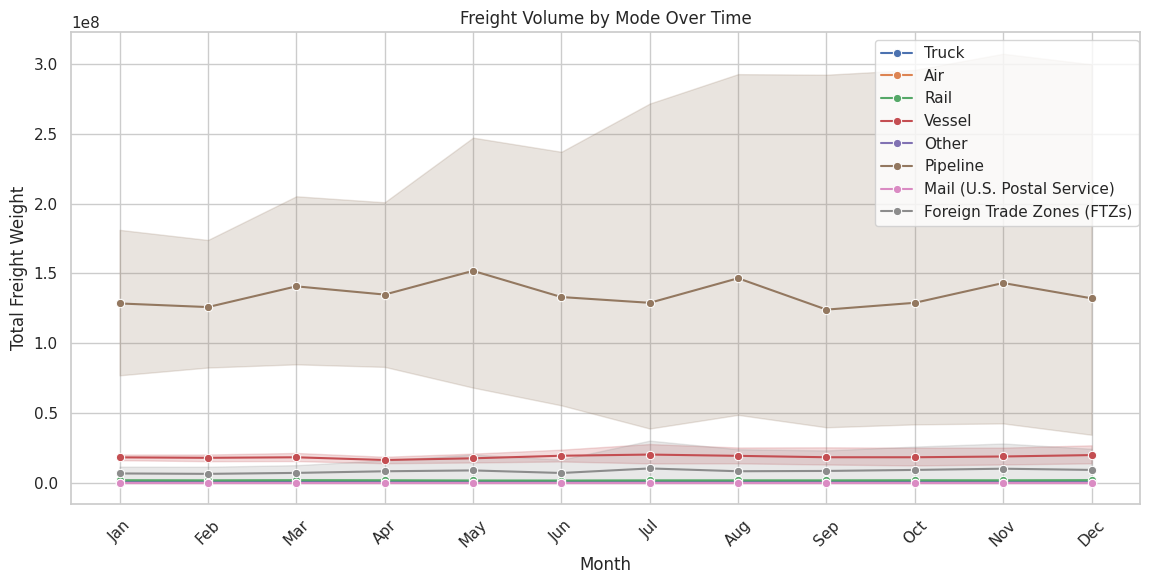

In [6]:
# 1. Which modes of transportation carry the largest volumes of freight by mode over time?
if {'MONTH', 'DISAGMOT', 'SHIPWT'}.issubset(df.columns):
    plt.figure(figsize=(12,6))
    sns.lineplot(data=df, x='Month_Name', y='SHIPWT', hue='Mode_Label', marker='o')
    plt.title("Freight Volume by Mode Over Time")
    plt.ylabel("Total Freight Weight")
    plt.xlabel("Month")
    plt.xticks(rotation=45)
    plt.legend(loc='upper left', bbox_to_anchor=(0.745, 1))
    plt.tight_layout()
    plt.show()

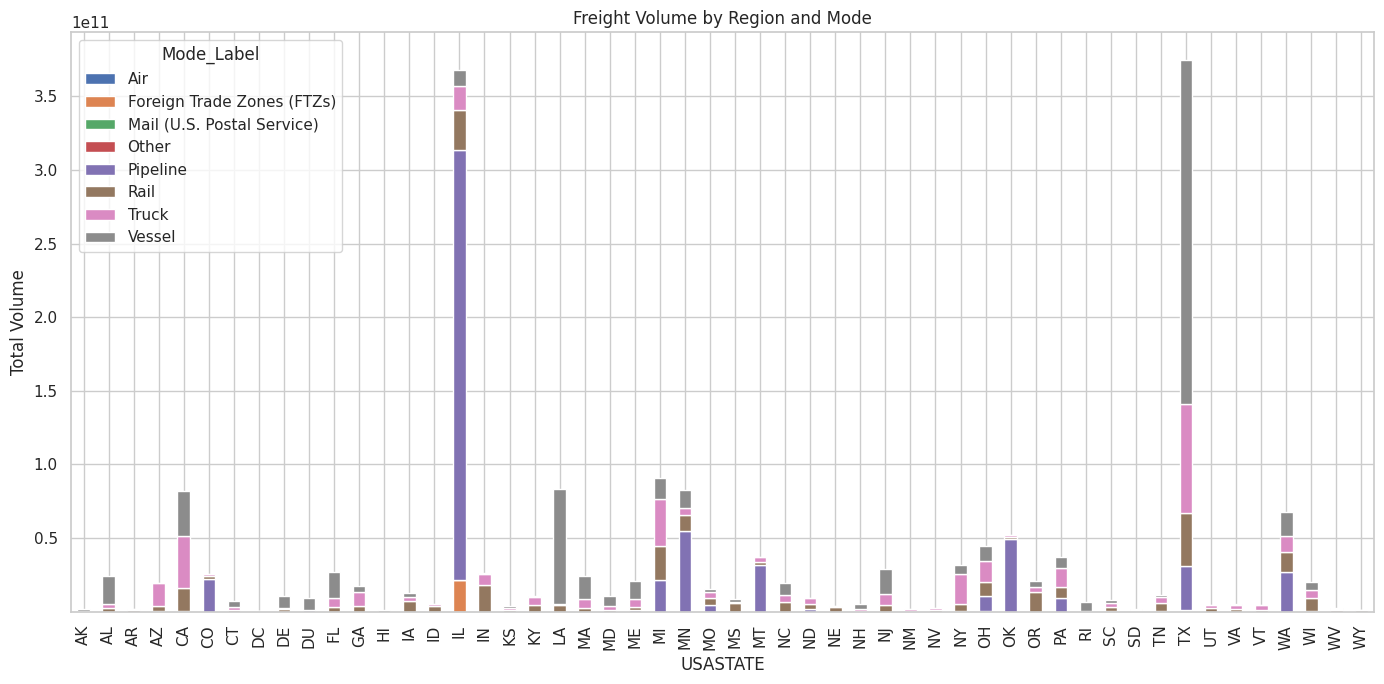

In [7]:
# 2. How does freight volume vary by region and mode over time?
if {'USASTATE', 'YEAR', 'DISAGMOT', 'SHIPWT'}.issubset(df.columns):
    pivot = df.pivot_table(index='USASTATE', columns='Mode_Label', values='SHIPWT', aggfunc='sum')
    pivot.plot(kind='bar', stacked=True, figsize=(14,7))
    plt.title("Freight Volume by Region and Mode")
    plt.ylabel("Total Volume")
    plt.tight_layout()
    plt.show()

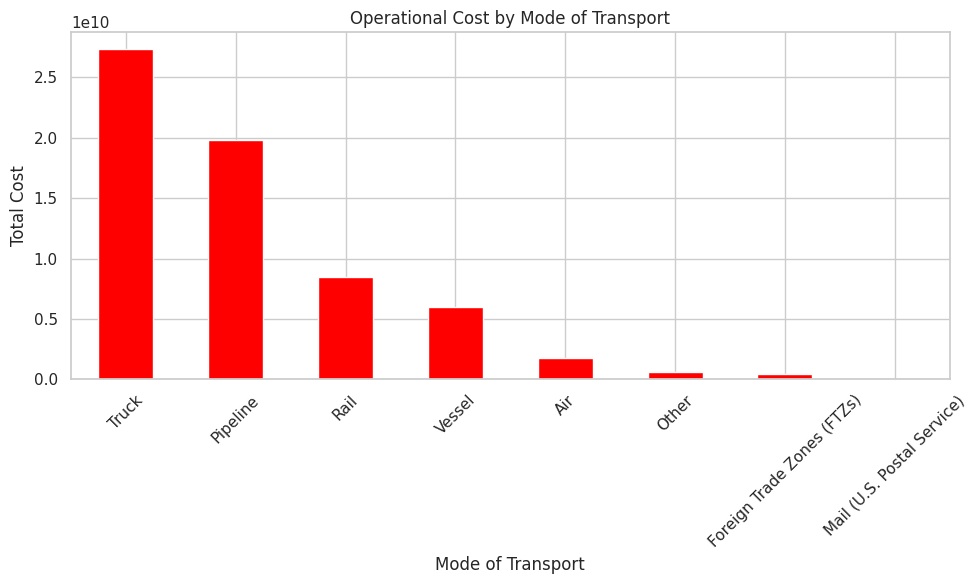

In [8]:
# 3. Where are the most significant operational inefficiencies (e.g., cost)?
if {'Mode_Label', 'FREIGHT_CHARGES'}.issubset(df.columns):
    cost_summary = df.groupby('Mode_Label')['FREIGHT_CHARGES'].sum().sort_values(ascending=False)
    cost_summary.plot(kind='bar', color='red', figsize=(10,6))
    plt.title("Operational Cost by Mode of Transport")
    plt.xlabel("Mode of Transport")
    plt.xticks(rotation=45)
    plt.ylabel("Total Cost")
    plt.tight_layout()
    plt.show()

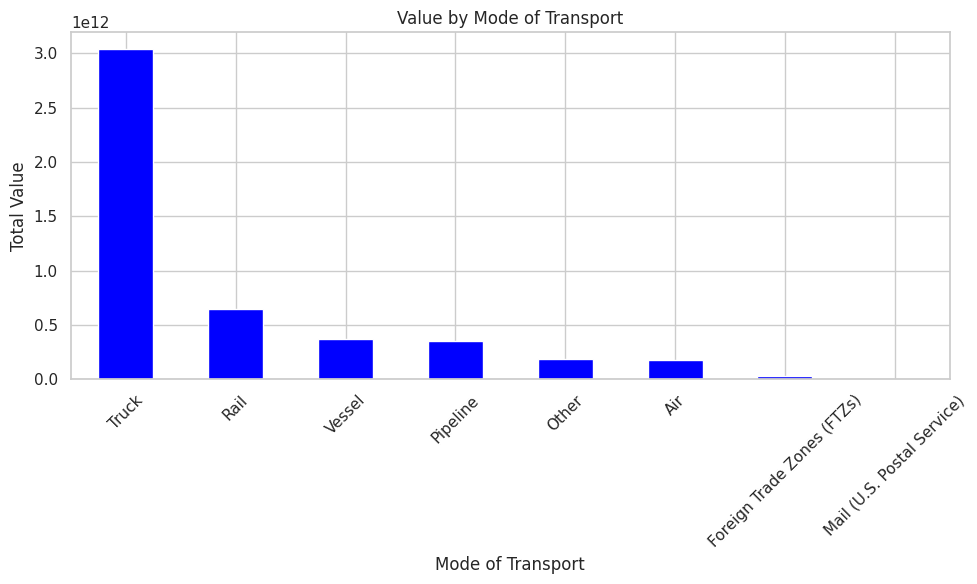

In [9]:
# 4. Which transportation modes carries goods with more value?
if {'Mode_Label', 'VALUE'}.issubset(df.columns):
    cost_summary = df.groupby('Mode_Label')['VALUE'].sum().sort_values(ascending=False)
    cost_summary.plot(kind='bar', color='blue', figsize=(10,6))
    plt.title("Value by Mode of Transport")
    plt.xlabel("Mode of Transport")
    plt.xticks(rotation=45)
    plt.ylabel("Total Value")
    plt.tight_layout()
    plt.show()

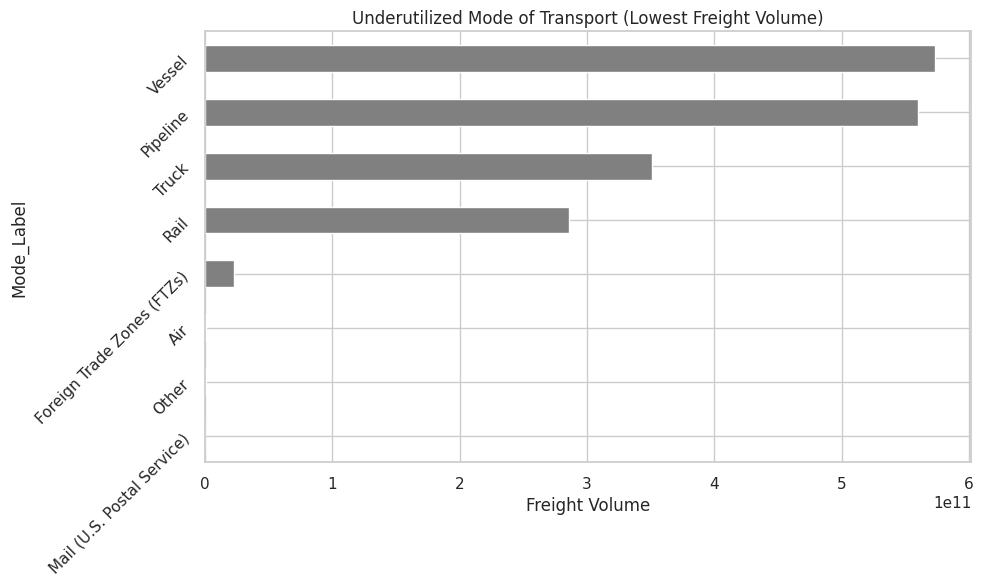

In [10]:
# 5. Underutilized modes of transport
if {'Mode_Label', 'SHIPWT'}.issubset(df.columns):
    underutilized = df.groupby('Mode_Label')['SHIPWT'].sum().sort_values().head(10)
    underutilized.plot(kind='barh', color='gray', figsize=(10,6), title="Underutilized Mode of Transport (Lowest Freight Volume)")
    plt.xlabel("Freight Volume")
    plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

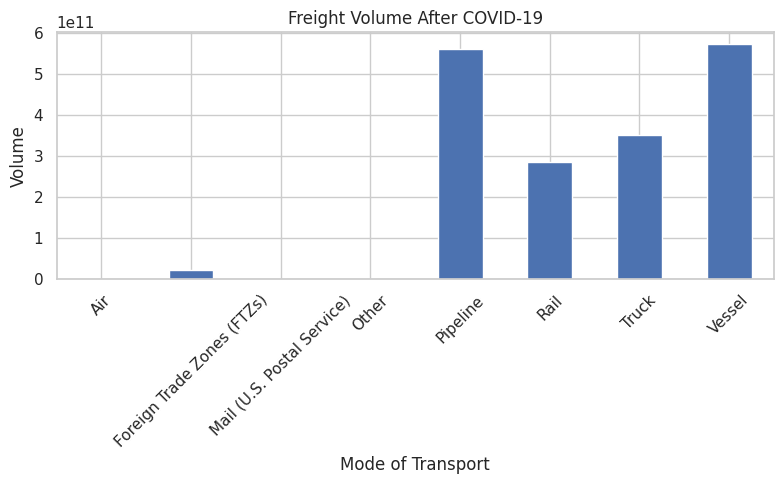

In [11]:
# 6. Impact of global/economic events
# Assuming years like 2020–2021 relate to COVID-19 and others may represent trade policy impacts
if 'YEAR' in df.columns and 'SHIPWT' in df.columns:
    covid_years = df[df['YEAR'] == 2023]  # Filter for the year 2023
    covid_summary = covid_years.groupby('Mode_Label')['SHIPWT'].sum()
    covid_summary.plot(kind='bar', figsize=(8,5), title="Freight Volume After COVID-19")
    plt.ylabel("Volume")
    plt.xlabel("Mode of Transport")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

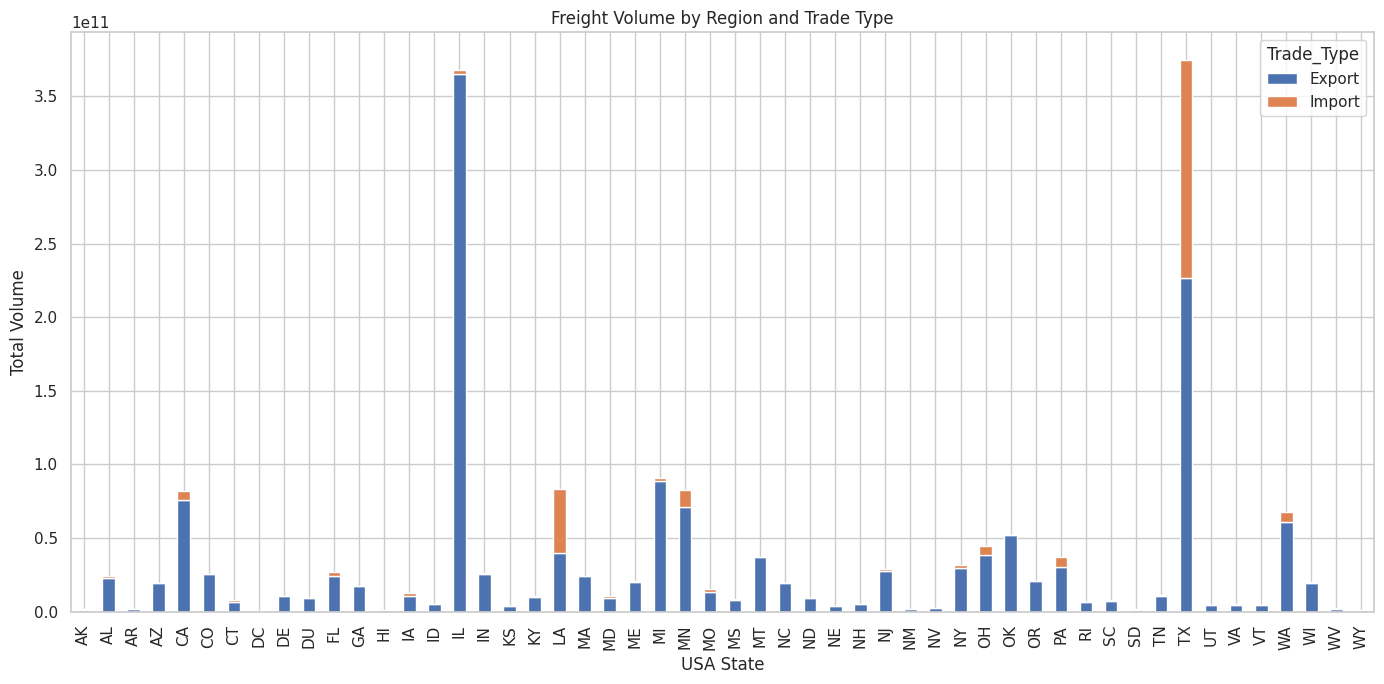

In [12]:
#7. Comparing Volume of Export vs Import by States
if {'USASTATE', 'TRDTYPE', 'SHIPWT'}.issubset(df.columns):
    pivot = df.pivot_table(index='USASTATE', columns='Trade_Type', values='SHIPWT', aggfunc='sum')
    pivot.plot(kind='bar', stacked=True, figsize=(14,7))
    plt.title("Freight Volume by Region and Trade Type")
    plt.ylabel("Total Volume")
    plt.xlabel("USA State")
    plt.tight_layout()
    plt.show()